# Newton's Method 

<i>for finding roots</i>

# What is Newton's Method

Newton's method is an iterative process for finding the roots of a function.

# Concept

The concept is to

- guess a starting $x$ point $(x_1)$

- find a linear equation that's tangent to and passes through $f(x_1)$

- move to the x intercept

- repeat

In [5]:
import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot as plt
from ipywidgets import widgets
%matplotlib nbagg

x = np.linspace(0.2, 2.2, 500)

def f(x):
    return np.log(x)

def f_line(f, x, x_n):
    slope = derivative(f, x_n, dx=0.1)
    x_nn = x_n - f(x_n) / slope 
    return slope * (x - x_n) + f(x_n), x_nn

def update_plot(order):
    x_n = 2
    ax.clear()
    ax.plot(x, f(x), label=r'$\ln(x)$')
    ax.axhline(0, color='gray', lw=0.5)

    for i in range(0, order):

        if i >= 1:
            ax.plot(x, f_l, '--', lw=1)
        
        ax.plot(x_n, f(x_n), 'kd', label=r'$f(x_{}={:.2f})={:.3f}$'.format(i + 1, x_n, f(x_n)))
        ax.vlines(x_n, 0, f(x_n), color='black', linestyle=':', lw=1)
        f_l, x_n = f_line(f, x, x_n)

        
    plt.setp(ax, xticks=[0, 1, 2], xticklabels=['0', '1', '2'],
             yticks=[-1, 0, 1], yticklabels=['-1', '0', '-1'])
    ax.set_ylim(-1, 1)
    ax.set_xlim(0, 2.2)
    ax.legend(loc=4)
    plt.show()

<IPython.core.display.Javascript object>


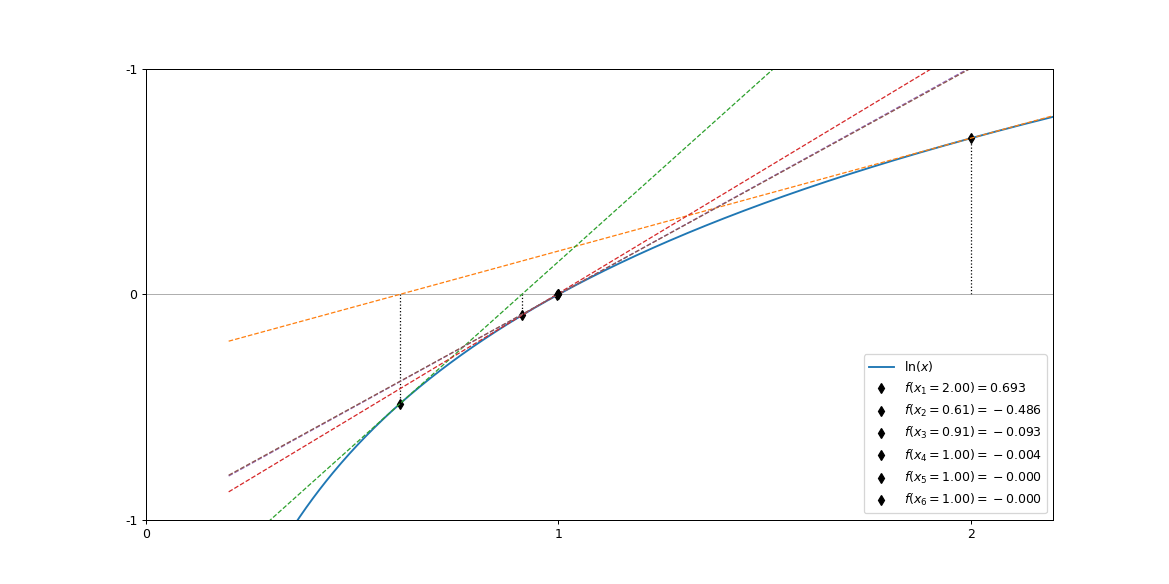

interactive(children=(IntSlider(value=1, description='order', max=6, min=1), Output()), _dom_classes=('widget-interact',))

In [6]:
fig, ax = plt.subplots(1, figsize=(13, 6.5))
order = widgets.IntSlider(min=1, max=6, value=1, description='order')
widgets.interactive(update_plot, order=order)

# Let's see how this method works

let's use the <i>point-slope</i> form of a linear equation

$$
y - y_1 = m(x - x_1)
$$

We have a point $x_1$ and $f(x_1)=y_1$

and a slope $m= f'(x_1)$

so let's plug in and find the $x$ intercept

$$
y - f(x_1) = f'(x_1)(x - x_1)
$$

Set $y=0$ and solve for $x_2$

$$
 - f(x_1) = f'(x_1)(x_2 - x_1)
$$

$$
-\frac{f(x_1)}{f'(x_1)} = x_2 - x_1
$$

$$
x_2 = x_1 - \frac{f(x_1)}{f'(x_1)}
$$

or in general terms

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

# Let's look at how to code this

In [3]:
import numpy as np
from scipy.misc import derivative

x_n = 2
x = np.linspace(0.2, 2.2, 500)

def f(x):
    return np.log(x)

def x_next(f, x, x_n):
    slope = derivative(f, x_n, dx=0.1)
    return x_n - f(x_n) / slope

for n in range(6):
    print('x_{} = {:.6f}'.format(n + 1, x_n))
    x_n = x_next(f, x, x_n)

x_1 = 2.000000
x_2 = 0.614862
x_3 = 0.911249
x_4 = 0.995599
x_5 = 0.999975
x_6 = 1.000000
